In [1]:
#THE MITCHELLS VS. THE MACHINES 

import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.python.keras import backend as K
import matplotlib.pyplot as plt

import os
# from PIL import ImageFile
# ImageFile.LOAD_TRUNCATED_IMAGES = True #Image Error Transparency

In [2]:
len([name for name in os.listdir('./data/test/') for name in os.listdir('./data/test/' + name)])

123

In [3]:
len([name for name in os.listdir('./data/train/') for name in os.listdir('./data/train/' + name)])

311

In [4]:
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'data/train'
validation_data_dir = 'data/test'
nb_train_samples = len([name for name in os.listdir('./data/train/') for name in os.listdir('./data/train/' + name)]) #300
nb_validation_samples = len([name for name in os.listdir('./data/test/') for name in os.listdir('./data/test/' + name)]) #123
# epochs = 10
batch_size = 8

print(K.image_data_format())

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

channels_last


In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3)) #class --> binary = 1 (0,1)
model.add(Activation('softmax')) #sigmoid


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [7]:
model.compile(loss='categorical_crossentropy', # binary_crossentropy or categorical_crossentropy  
              optimizer='adam',# rmsprop or adagrad or  #adam
              metrics=['accuracy'])

In [8]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical') #binary # categorical

print(train_generator.class_indices)

Found 311 images belonging to 3 classes.
{'dog': 0, 'loaf': 1, 'pig': 2}


In [9]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical') #binary # categorical

print(validation_generator.class_indices)

Found 123 images belonging to 3 classes.
{'dog': 0, 'loaf': 1, 'pig': 2}


In [10]:
epochs = 20

history =model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples // batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=nb_validation_samples // batch_size)

# model.save('modelDogCat.h5')
# model.save_weights('modelDogCat.h5')

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
38/38 [==============================] - 6s 163ms/step - loss: 1.1323 - accuracy: 0.3630 - val_loss: 1.0860 - val_accuracy: 0.3667
Epoch 2/20
38/38 [==============================] - 6s 158ms/step - loss: 1.0424 - accuracy: 0.4884 - val_loss: 1.0440 - val_accuracy: 0.2750
Epoch 3/20
38/38 [==============================] - 6s 158ms/step - loss: 0.9755 - accuracy: 0.5413 - val_loss: 0.9634 - val_accuracy: 0.5333
Epoch 4/20
38/38 [==============================] - 6s 165ms/step - loss: 0.9012 - accuracy: 0.5974 - val_loss: 0.8385 - val_accuracy: 0.6500
Epoch 5/20
38/38 [==============================] - 6s 167ms/step - loss: 0.8430 - accuracy: 0.6337 - val_loss: 0.7367 - val_accuracy: 0.6750
Epoch 6/20
38/38 [==============================] - 6s 159ms/step - loss: 0.8239 - accuracy: 0.6370 - val_loss: 0.7268 - val_accuracy: 0.6667
Epoch 7/20
38/38 [==============================] - 7s 175ms/step - loss

In [11]:
model.save('model_machines.h5')

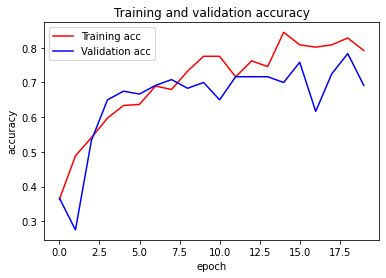

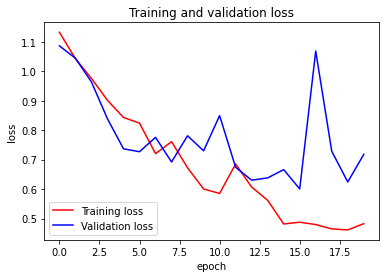

In [12]:
#Graphing our training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

# TEST

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.models import load_model
from tensorflow.python.keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt

In [14]:
# dimensions of our images
img_width, img_height = 150, 150

# load the model we saved
model = load_model('model_machines.h5')

['561000004586801.jpg', '7.jpg', 'Bread-Machine-Sandwich-Bread-Loaf_Recipe.jpg', 'images (1).jpg', 'images.jpg', 'PAL.png', 'pig-00083897637337252373991951_normal.jpg', 'pig-full-body.jpg', 'the-mitchells-vs-the-machines-monchi-1618568457.jpg', 'UPcy5L0g.jpg']
561000004586801.jpg


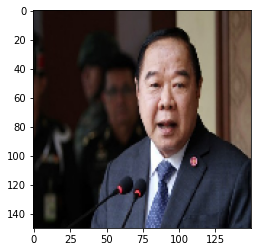

[[9.9460369e-01 1.2137437e-04 5.2748923e-03]]
dog , 99.46
561000004586801.jpg: dog
--------------------------------------------------------------
7.jpg


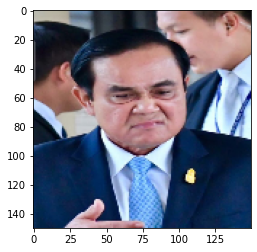

[[9.9892503e-01 2.7876407e-05 1.0470890e-03]]
dog , 99.89
7.jpg: dog
--------------------------------------------------------------
Bread-Machine-Sandwich-Bread-Loaf_Recipe.jpg


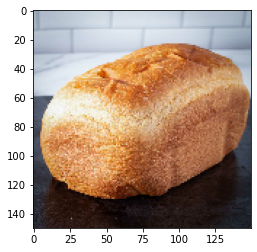

[[0.00275337 0.99080664 0.00644007]]
loaf ,99.08
Bread-Machine-Sandwich-Bread-Loaf_Recipe.jpg: loaf
--------------------------------------------------------------
images (1).jpg


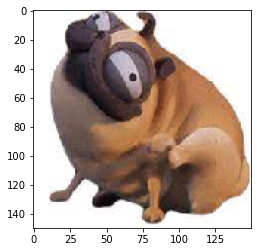

[[0.9245482  0.00317694 0.07227488]]
dog , 92.45
images (1).jpg: dog
--------------------------------------------------------------
images.jpg


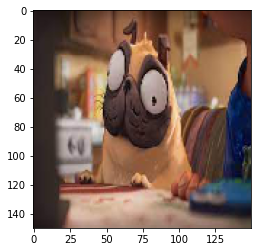

[[0.9359357 0.0302158 0.0338486]]
dog , 93.59
images.jpg: dog
--------------------------------------------------------------
PAL.png


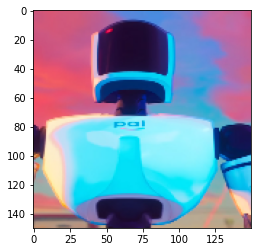

[[9.9592447e-01 2.2979197e-04 3.8457063e-03]]
dog , 99.59
PAL.png: dog
--------------------------------------------------------------
pig-00083897637337252373991951_normal.jpg


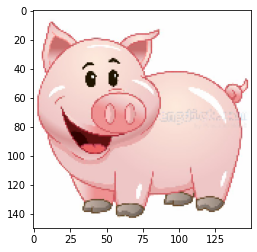

[[0.01019355 0.02369772 0.96610874]]
pig , 96.61
pig-00083897637337252373991951_normal.jpg: pig
--------------------------------------------------------------
pig-full-body.jpg


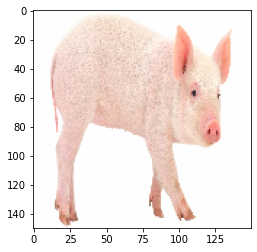

[[0.0083147  0.04380742 0.9478778 ]]
pig , 94.79
pig-full-body.jpg: pig
--------------------------------------------------------------
the-mitchells-vs-the-machines-monchi-1618568457.jpg


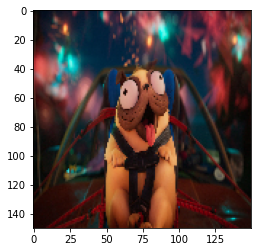

[[9.7470236e-01 3.6580785e-04 2.4931932e-02]]
dog , 97.47
the-mitchells-vs-the-machines-monchi-1618568457.jpg: dog
--------------------------------------------------------------
UPcy5L0g.jpg


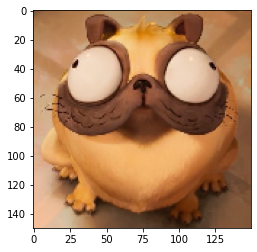

[[0.01210581 0.3484906  0.6394036 ]]
pig , 63.94
UPcy5L0g.jpg: pig
--------------------------------------------------------------


In [19]:
mypath = "the-mitchells/"

#label_calss = {'dog': 0, 'loaf': 1, 'pig': 2}

onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(onlyfiles)

# predicting images
for file in onlyfiles:
    print(file)
    img = image.load_img(mypath+file, target_size=(img_width, img_height)) #150x150
    
    imgplot = plt.imshow(img)
    plt.show()
    
    
    x = image.img_to_array(img)
    x /= 255.0
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict(images)
    #classes = model.predict_classes(images)
    print(classes)
    #classes = classes[0][0]
    
    if np.argmax(classes) == 0:
        print("%s , %.2f" % ("dog", (classes[0][np.argmax(classes)]*100)))
        print(file + ": " + 'dog')
    
    elif np.argmax(classes) == 1:
        print("%s ,%.2f" % ("loaf", (classes[0][np.argmax(classes)]*100)))
        print(file + ": " + 'loaf')
        
    else:
        print("%s , %.2f" % ("pig", (classes[0][np.argmax(classes)]*100)))
        print(file + ": " + 'pig')
        
    print('--------------------------------------------------------------')